### Tool Box

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score, confusion_matrix, classification_report, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import VarianceThreshold
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_selection import SelectFromModel

from imblearn.over_sampling import SMOTE
import xgboost as xgb

from collections import Counter
import pickle
import re
import warnings
warnings.filterwarnings('ignore')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

In [ ]:
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

### Load the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load the dataset:

In [ ]:
base_dir = "/content/drive/MyDrive/Bluechip-DSN-ML-Hack"
train = pd.read_csv(f"{base_dir}/Train.csv")
test = pd.read_csv(f"{base_dir}/Test.csv")

Train Info:

In [ ]:

print(train.info())
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5898 entries, 0 to 5897
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5898 non-null   int64  
 1   Loan_ID            5898 non-null   object 
 2   Gender             5898 non-null   int64  
 3   Married            5898 non-null   int64  
 4   Dependents         5898 non-null   object 
 5   Education          5898 non-null   int64  
 6   Self_Employed      5898 non-null   int64  
 7   ApplicantIncome    5898 non-null   int64  
 8   CoapplicantIncome  5898 non-null   float64
 9   LoanAmount         5898 non-null   int64  
 10  Loan_Amount_Term   5898 non-null   int64  
 11  Credit_History     5898 non-null   int64  
 12  Property_Area      5898 non-null   int64  
 13  Loan_Status        5898 non-null   int64  
 14  Total_Income       5898 non-null   int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 691.3+ KB
None


,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
count,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000,5898.000000
mean,54964.183452,0.910817,0.854527,0.120210,0.107664,7782.026958,1245.954548,97.410478,359.114954,0.920482,1.183961,0.832994,5239.284503
std,26133.640949,0.285032,0.352607,0.325235,0.309981,9182.571831,2368.012349,103.483478,48.876088,0.270569,0.730568,0.373013,2308.679455
min,10002.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,0.000000,1963.000000
25%,32337.000000,1.000000,1.000000,0.000000,0.000000,2342.250000,0.000000,17.000000,357.000000,1.000000,1.000000,1.000000,3750.000000
50%,55501.000000,1.000000,1.000000,0.000000,0.000000,6989.000000,117.562275,42.000000,368.000000,1.000000,1.000000,1.000000,6000.000000
75%,77775.750000,1.000000,1.000000,0.000000,0.000000,8375.000000,1680.894542,174.000000,372.000000,1.000000,2.000000,1.000000,6000.000000
max,99998.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,1.000000,22500.000000


Test info:

In [ ]:
print(test.info())
test.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2528 entries, 0 to 2527
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2528 non-null   int64  
 1   Loan_ID            2528 non-null   object 
 2   Gender             2528 non-null   int64  
 3   Married            2528 non-null   int64  
 4   Dependents         2528 non-null   object 
 5   Education          2528 non-null   int64  
 6   Self_Employed      2528 non-null   int64  
 7   ApplicantIncome    2528 non-null   int64  
 8   CoapplicantIncome  2528 non-null   float64
 9   LoanAmount         2528 non-null   int64  
 10  Loan_Amount_Term   2528 non-null   int64  
 11  Credit_History     2528 non-null   int64  
 12  Property_Area      2528 non-null   int64  
 13  Total_Income       2528 non-null   int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 276.6+ KB
None


,ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
count,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000,2528.000000
mean,55348.986551,0.916139,0.833465,0.118671,0.103244,7712.301820,1262.994361,96.474684,359.701741,0.927611,1.214003,5188.653481
std,26098.461169,0.277234,0.372634,0.323465,0.304337,8653.011599,2288.564517,105.096113,48.404472,0.259183,0.714823,2236.524313
min,10001.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,3083.000000
25%,32297.250000,1.000000,1.000000,0.000000,0.000000,2426.250000,0.000000,17.000000,357.000000,1.000000,1.000000,3750.000000
50%,55979.000000,1.000000,1.000000,0.000000,0.000000,7051.500000,167.431656,36.000000,368.000000,1.000000,1.000000,5166.000000
75%,77562.250000,1.000000,1.000000,0.000000,0.000000,8380.250000,1855.758084,171.000000,372.000000,1.000000,2.000000,6000.000000
max,99931.000000,1.000000,1.000000,1.000000,1.000000,81000.000000,20000.000000,700.000000,480.000000,1.000000,2.000000,18917.000000


### Explore the dataset

In [ ]:
train.head()

,ID,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,74768,LP002231,1,1,0,1,0,8328,0.000000,17,363,1,2,1,6000
1,79428,LP001448,1,1,0,0,0,150,3857.458782,188,370,1,1,0,6000
2,70497,LP002231,0,0,0,0,0,4989,314.472511,17,348,1,0,0,6000
3,87480,LP001385,1,1,0,0,0,150,0.000000,232,359,1,1,1,3750
4,33964,LP002231,1,1,1,0,0,8059,0.000000,17,372,1,0,1,3750


In [ ]:

# change the type of the target to int and then seperate it it from the train dataset
target = train['Loan_Status'].astype(int)

train.drop('Loan_Status', axis=1, inplace=True)

In [ ]:
# check for unique values of each variable
for col in train.columns:
    print(f'{col} -->')
    print(train[col].nunique())
    print('\n')

ID -->
5898


Loan_ID -->
457


Gender -->
2


Married -->
2


Dependents -->
4


Education -->
2


Self_Employed -->
2


ApplicantIncome -->
3708


CoapplicantIncome -->
3121


LoanAmount -->
343


Loan_Amount_Term -->
259


Credit_History -->
2


Property_Area -->
3


Total_Income -->
29




In [ ]:

# firstly drop load id
train.drop('ID', inplace=True, axis=1)

test_id = test['ID']
test = test.drop('ID', axis=1)

In [ ]:
# check for duplicated records
train.duplicated().sum()

0

In [ ]:

# change the types of features with 4 or less unique values from numerical to object
def change_to_str(df):
  for col in df.columns:
    if df[col].nunique() < 6:
      df[col] = df[col].astype('str')

change_to_str(train)
change_to_str(test)

In [ ]:
test.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,int64
Loan_Amount_Term,int64


### Preparing the dataset for a linear model

check for outliers on numerical columns:

In [ ]:
num_df = train.select_dtypes(exclude='O')
num_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income
0,8328,0.000000,17,363,6000
1,150,3857.458782,188,370,6000
2,4989,314.472511,17,348,6000
3,150,0.000000,232,359,3750
4,8059,0.000000,17,372,3750


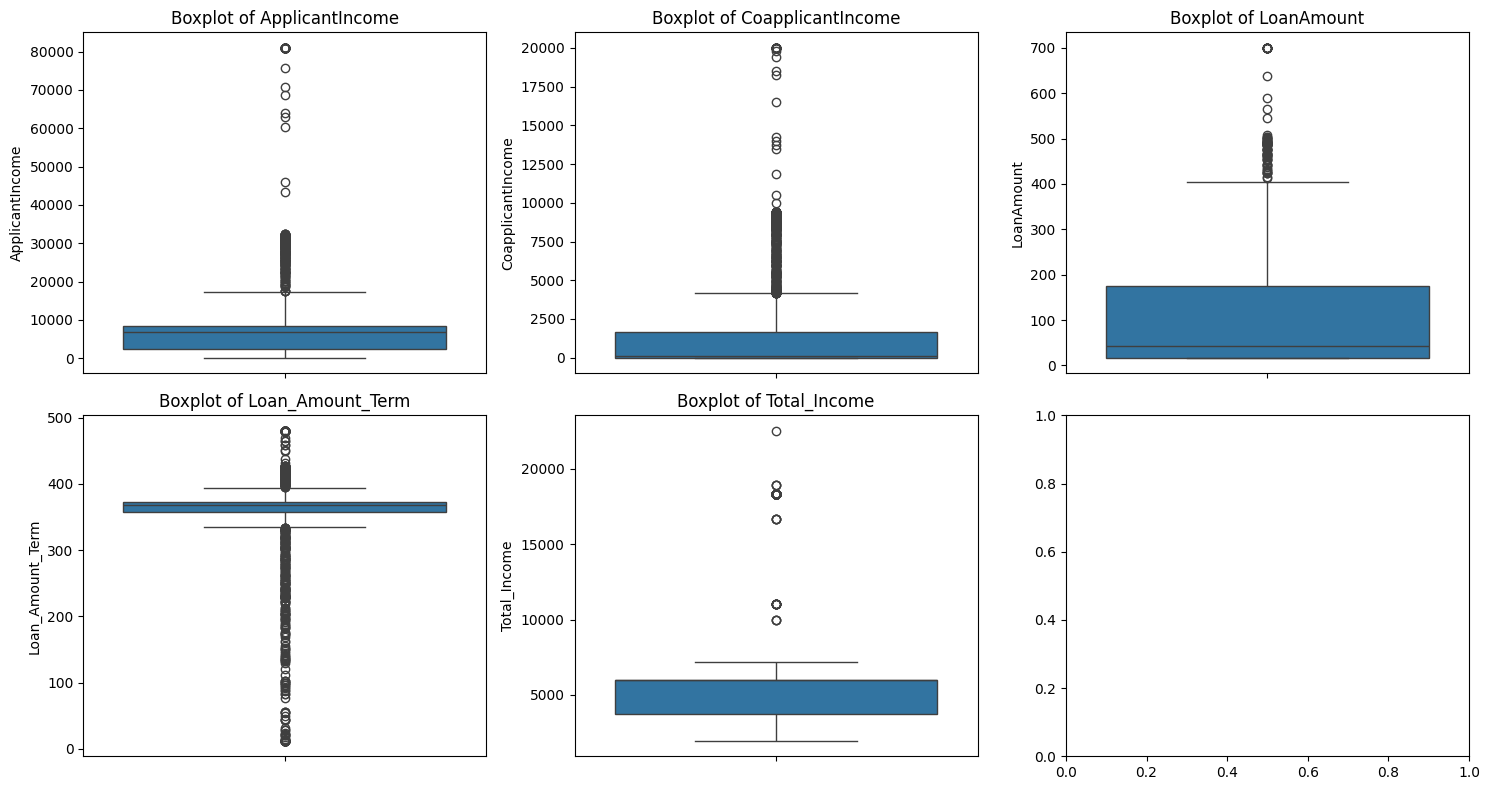

In [ ]:
if num_df.shape[1]%2 == 0:
  r = num_df.shape[1]/2
  c = r
else:
  r = num_df.shape[1]//2
  c = r+1

fig, axes = plt.subplots(r, c, figsize=(15, 8))
axes = axes.flatten()
for i, feature in enumerate(num_df.columns):
    sns.boxplot(num_df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
num_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Total_Income'],
      dtype='object')

In [ ]:
obj_df = train.select_dtypes(include='O')
obj_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP002231,1,1,0,1,0,1,2
1,LP001448,1,1,0,0,0,1,1
2,LP002231,0,0,0,0,0,1,0
3,LP001385,1,1,0,0,0,1,1
4,LP002231,1,1,1,0,0,1,0


In [ ]:
# drop Loan_ID
obj_df.drop('Loan_ID', axis=1, inplace=True)
test.drop('Loan_ID', axis=1, inplace=True)

#### Select Categorical Columns

In [ ]:
# seperate the object dtypes column into ordinal and onehot encoding colimns
ordinal_columns = ['Property_Area', 'Dependents']
onehot_columns = ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Education']

In [ ]:
for c in ordinal_columns:
  print(obj_df[c].value_counts(), '\n')

Property_Area
1    2551
2    2216
0    1131
Name: count, dtype: int64 

Dependents
0     3659
1     1157
3+     546
2      536
Name: count, dtype: int64 



In [ ]:
# Dependents column has an inconsistent value
obj_df['Dependents'] = obj_df['Dependents'].str.replace('3+', '3')

# do the same thing for test
test['Dependents'] = test['Dependents'].str.replace('3+', '3')

obj_df['Dependents'].value_counts()

,count
Dependents,
0,3659
1,1157
3,546
2,536


In [ ]:
# check the unique values in the onehot encoding columns
for c in onehot_columns:
  print(obj_df[c].value_counts(), '\n')

Gender
1    5372
0     526
Name: count, dtype: int64 

Married
1    5040
0     858
Name: count, dtype: int64 

Self_Employed
0    5263
1     635
Name: count, dtype: int64 

Credit_History
1    5429
0     469
Name: count, dtype: int64 

Education
0    5189
1     709
Name: count, dtype: int64 



In [ ]:
obj_df[ordinal_columns] = obj_df[ordinal_columns].astype('category')
obj_df[onehot_columns] = obj_df[onehot_columns].astype('category')

test[obj_df.columns] = test[obj_df.columns].astype('category')

In [ ]:
concatenated_train = pd.concat([num_df, obj_df], axis=1)
concatenated_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,8328,0.000000,17,363,6000,1,1,0,1,0,1,2
1,150,3857.458782,188,370,6000,1,1,0,0,0,1,1
2,4989,314.472511,17,348,6000,0,0,0,0,0,1,0
3,150,0.000000,232,359,3750,1,1,0,0,0,1,1
4,8059,0.000000,17,372,3750,1,1,1,0,0,1,0


### SMOTE The Dataset

The commented code above converted all categorical column to int so that I could apply SMOTE on it. Could this be the best way? Although i i converted it to int before applying SMOTE and then used it for random forest model which yielded score of 0.83550 on Kaggle. On this day (11/17/2024), I will onehot encode columns with more than 2 categories and use ordinal encoding for binary folumns.

**Encode categorical columns before smoothing**

To smoothing a dataset, all the columns needs to be in numerical format. I convert the categorical column using onehot encoding and ordinal encoding depending on the understanding of the category.

In [ ]:
# ordinal encoding is same as label encoding for binary columns. It only considers orderliness for multi-category
binary_columns = ['Gender', 'Married', 'Self_Employed', 'Credit_History', 'Education']
ordinal_columns = ['Property_Area', 'Dependents']

In [ ]:
def encode_categorical(train_df, test_df):
  # Preprocessing for categorical data
  # Since smoothing requires all columns to be numerical
  # Binary columns are onehot encoded
  # Non-Binary columns are ordinal encoded

  binary_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')
  ordinal_transformer = OrdinalEncoder()

  # Bundle preprocessing for numerical and categorical features
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', 'passthrough', num_df.columns),
          ('onehot', binary_transformer, binary_columns),
          ('ordinal', ordinal_transformer, ordinal_columns)
      ])

  # Preprocess and apply the pipeline
  concatenated_train_processed, test_processed = preprocessor.fit_transform(train_df), preprocessor.transform(test_df)

  # Combine all features into a single list
  onehot_feature_names = preprocessor.named_transformers_['onehot'].get_feature_names_out(binary_columns)
  preprocessed_feature_names = list(num_df.columns) + list(onehot_feature_names) + ordinal_columns

  # Create a DataFrame for better correlation handling
  concatenated_train_processed_df = pd.DataFrame(concatenated_train_processed, columns=preprocessed_feature_names)
  test_processed_df = pd.DataFrame(test_processed, columns=preprocessed_feature_names)

  return concatenated_train_processed_df, test_processed_df

In [ ]:
# Preprocess and apply the pipeline
concatenated_train_encoded, test_encoded =  encode_categorical(concatenated_train, test)

# oversmapling
sm = SMOTE(random_state=42)
concatenated_train_encoded_os, target_encoded_os = sm.fit_resample(concatenated_train_encoded, target)

**Convert all categorical columns to int before smoothing**

In [ ]:
# change the types of categorical column to int
def from_category_to_int(df):
  copied_df = df.copy()
  for col in copied_df.columns:
    if copied_df[col].dtype == 'category':
      copied_df[col] = df[col].astype(int)

  return copied_df

In [ ]:
concatenated_train_int = from_category_to_int(concatenated_train)
test_int = from_category_to_int(test)

In [ ]:
sm = SMOTE(random_state=42)

concatenated_train_int_os, target_int_os = sm.fit_resample(concatenated_train_int, target)

In [ ]:
concatenated_train.shape, concatenated_train_encoded_os.shape, concatenated_train_int_os.shape,

((5898, 12), (9826, 12), (9826, 12))

### Unscaled Data: with simple model

#### Check for multicollinearity

In [ ]:
correlated_columns_to_drop = {}

In [ ]:
def check_multicolinearity(df, df_type=''):
  # Compute the correlation matrix
  correlation_matrix = df.corr().abs()

  # Select upper triangle of correlation matrix
  upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
  upper_triangle_corr = pd.DataFrame(upper_triangle, index=correlation_matrix.index, columns=correlation_matrix.columns) * correlation_matrix

  # Find columns with high correlation
  threshold = 0.7
  high_corr_columns = [
      (column, correlated_column)
      for column in correlation_matrix.columns
      for correlated_column in correlation_matrix.columns
      if upper_triangle_corr.loc[column, correlated_column] >= threshold
  ]

  # Drop one column from each pair
  columns_to_drop = set()
  for col1, col2 in high_corr_columns:
      columns_to_drop.add(col2)  # Keep only the first column

  if df_type == 'int':
    correlated_columns_to_drop['int df'] = columns_to_drop
  elif df_type == 'encoded':
    correlated_columns_to_drop['encoded df'] = columns_to_drop
  elif df_type == 'int os':
    correlated_columns_to_drop['int df os'] = columns_to_drop
  elif df_type == 'encoded os':
    correlated_columns_to_drop['encoded df os'] = columns_to_drop
  elif df_type == 'scaled os':
    correlated_columns_to_drop['encoded df os'] = columns_to_drop

  # Drop columns from the DataFrame
  concatenated_corr_df = df.drop(columns=columns_to_drop)

  print("Columns dropped due to high correlation:", columns_to_drop, '\n')

  plt.figure(figsize=(15, 8))
  sns.heatmap(concatenated_corr_df.corr(), annot=True)
  plt.title("Correlation Matrix After Dropping Highly Correlated Columns")
  plt.show()


For int categories:

Columns dropped due to high correlation: set() 



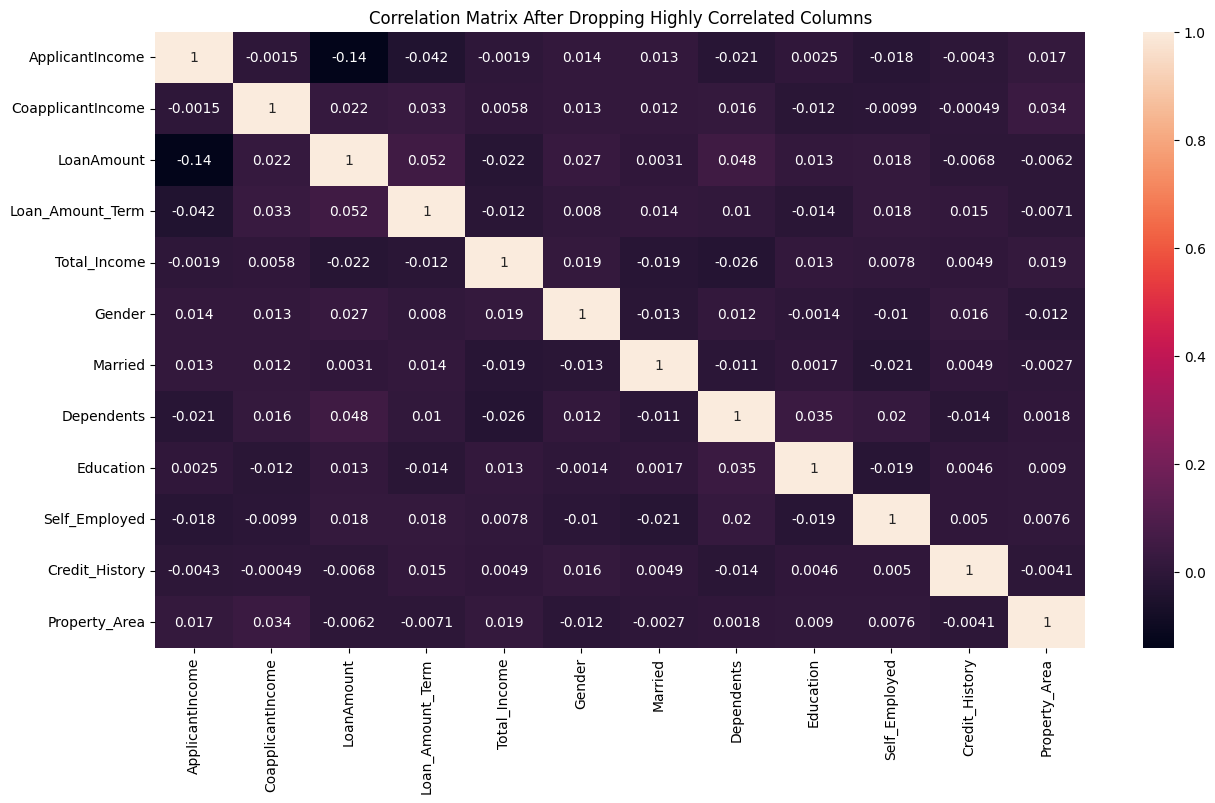

In [ ]:
check_multicolinearity(concatenated_train_int, 'int')

For category encoded:

Columns dropped due to high correlation: set() 



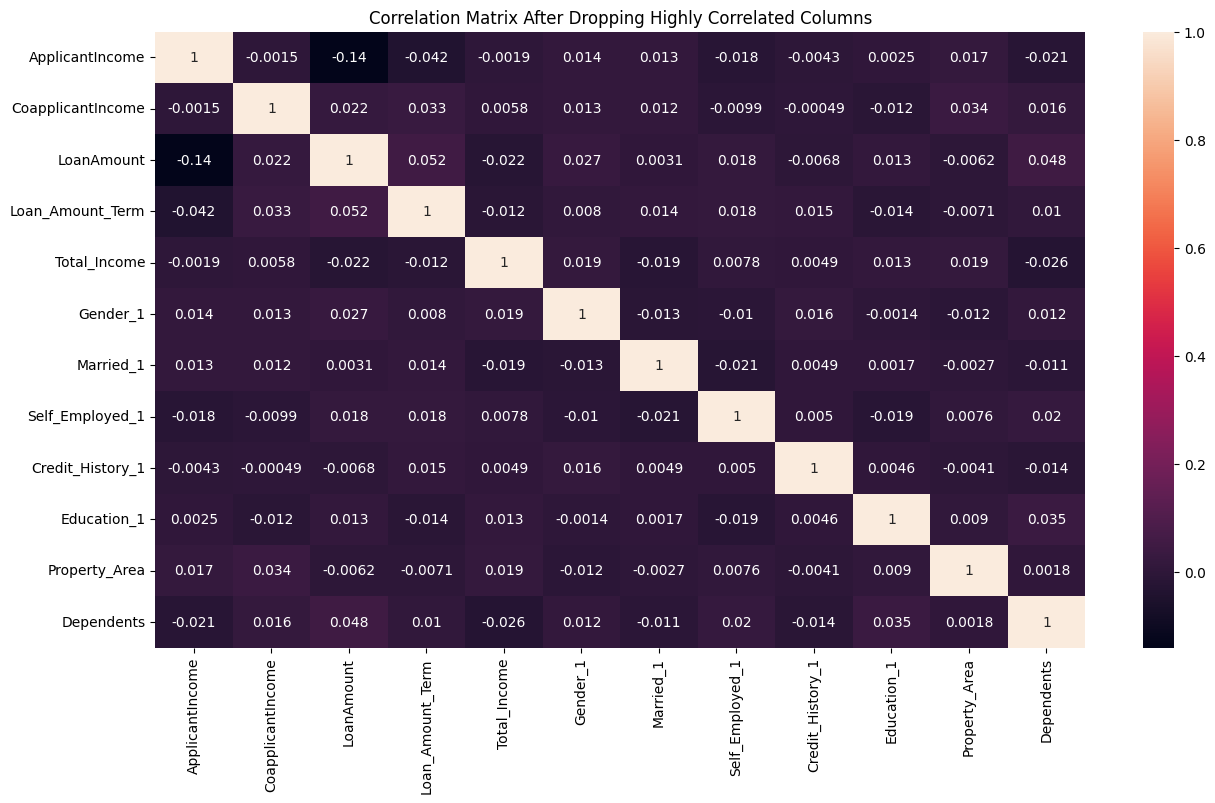

In [ ]:
check_multicolinearity(concatenated_train_encoded, 'encoded')

 For oversampled encoded dataset:

Columns dropped due to high correlation: set() 



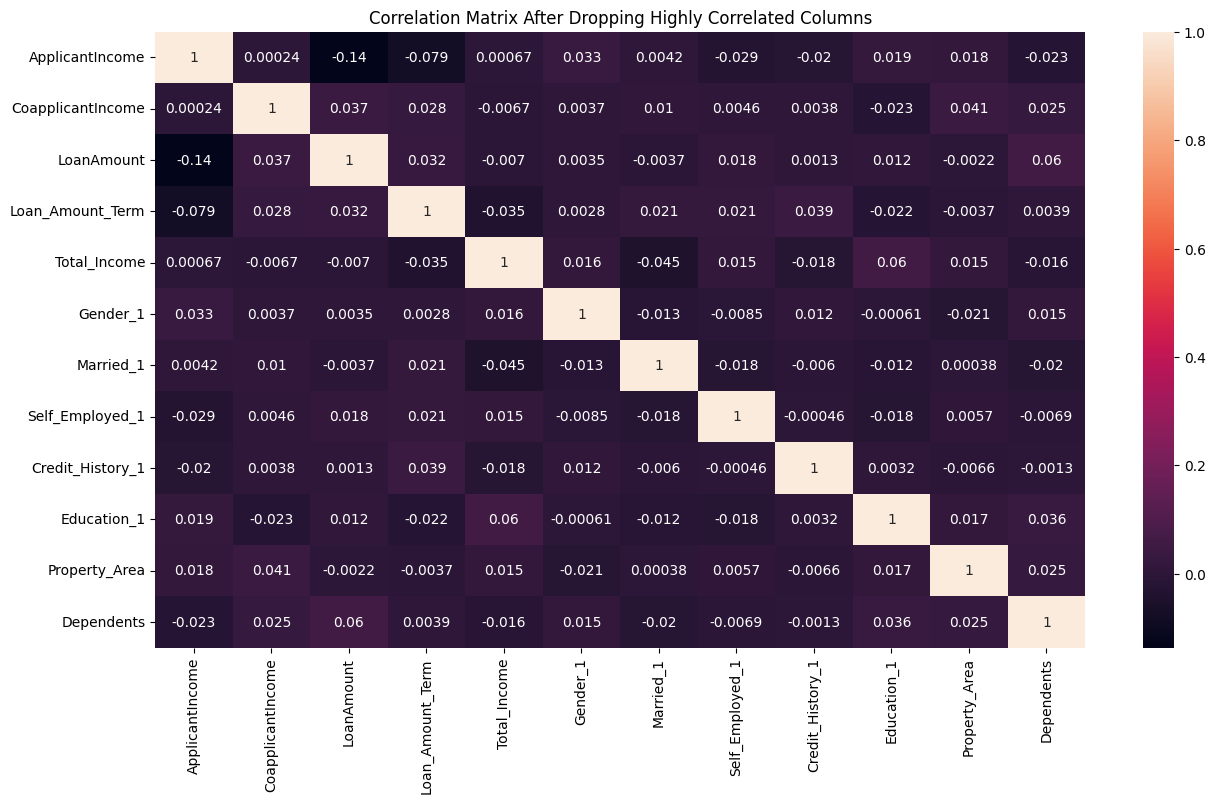

In [ ]:
check_multicolinearity(concatenated_train_encoded_os, 'encoded os')

Columns dropped due to high correlation: set() 



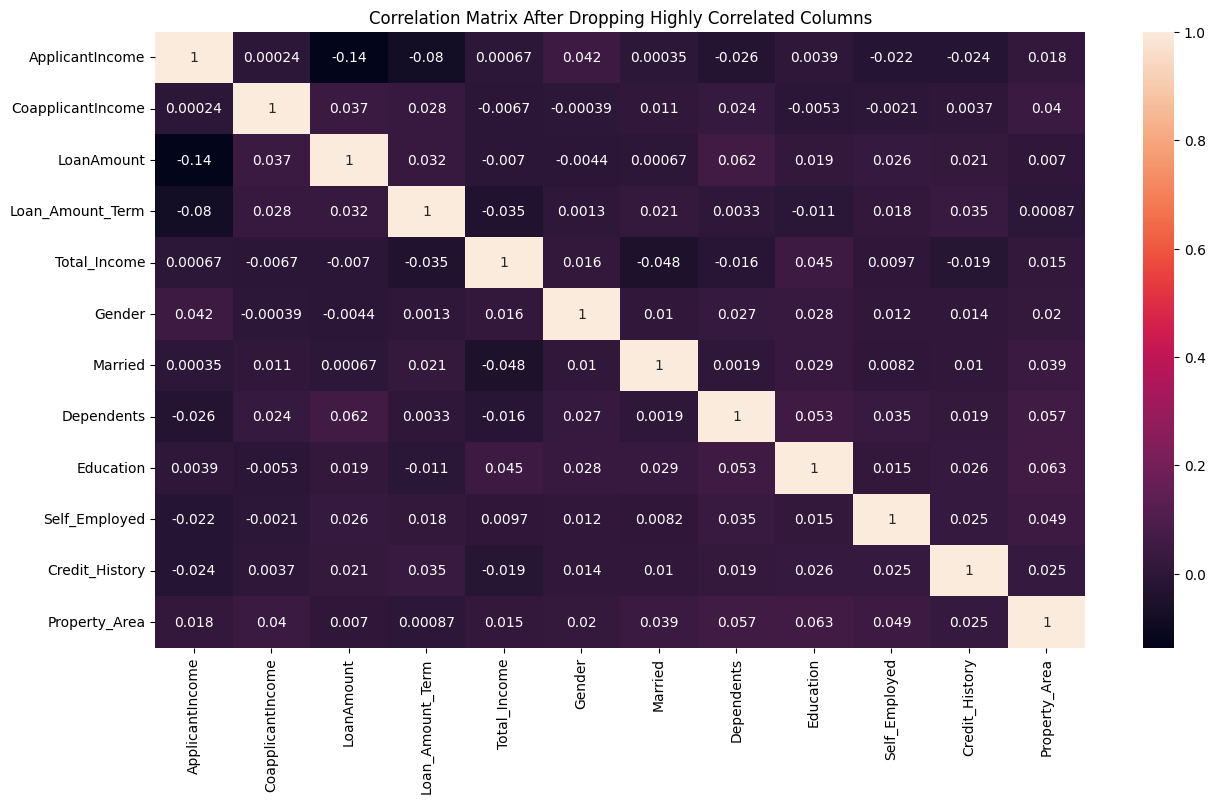

In [ ]:
check_multicolinearity(concatenated_train_int_os, 'int os')

In [ ]:
correlated_columns_to_drop

{'int df': set(),
 'encoded df': set(),
 'encoded df os': set(),
 'int df os': set()}

There is also no multicolinearity from any of encoded or int categories and their respective oversampled data above.

#### Train Model Training

In [ ]:
simple_models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(), # might need tuning for larger datasets.
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    'XGB': xgb.XGBClassifier(objective='binary:logistic', random_state=42, enable_categorical=True),
    'Light XGB': LGBMClassifier(), # default parameters are well-optimized for general use cases.
    'Catboost': CatBoostClassifier(verbose=0), # default parameters are well-optimized for general use cases.
    'Naive Bayes': GaussianNB()
  }

In [ ]:
def train_test_model(train, target, models_dict):

  X_train, X_test, y_train, y_test = train_test_split(train, target,
                                                      test_size=0.3, random_state=42)

  for name, model in models_dict.items():
    print(f'{"<"*15}{">"*15}')
    print(name)
    print(f'{"<"*15}{">"*15}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

Encoded Data:

In [ ]:
train_test_model(concatenated_train_encoded, target, simple_models)

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Logistic Regression
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[   0  294]
 [   0 1476]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.83      1.00      0.91      1476

    accuracy                           0.83      1770
   macro avg       0.42      0.50      0.45      1770
weighted avg       0.70      0.83      0.76      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  54  240]
 [ 272 1204]]
              precision    recall  f1-score   support

           0       0.17      0.18      0.17       294
           1       0.83      0.82      0.82      1476

    accuracy                           0.71      1770
   macro avg       0.50      0.50      0.50      1770
weighted avg       0.72      0.71      0.72      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[   2  292]
 [   9 1467]]
              precision    reca

Non-Encoded Data:

In [ ]:
train_test_model(concatenated_train_int, target, simple_models)

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Logistic Regression
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[   0  294]
 [   0 1476]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.83      1.00      0.91      1476

    accuracy                           0.83      1770
   macro avg       0.42      0.50      0.45      1770
weighted avg       0.70      0.83      0.76      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  51  243]
 [ 268 1208]]
              precision    recall  f1-score   support

           0       0.16      0.17      0.17       294
           1       0.83      0.82      0.83      1476

    accuracy                           0.71      1770
   macro avg       0.50      0.50      0.50      1770
weighted avg       0.72      0.71      0.72      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[   2  292]
 [   6 1470]]
              precision    reca

The simple model performed better on the non-encoded dataset
> * Decision Tree was the best

Encoded Oversampled Dataset

In [ ]:
train_test_model(concatenated_train_encoded_os, target_encoded_os, simple_models)

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Logistic Regression
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[842 600]
 [786 720]]
              precision    recall  f1-score   support

           0       0.52      0.58      0.55      1442
           1       0.55      0.48      0.51      1506

    accuracy                           0.53      2948
   macro avg       0.53      0.53      0.53      2948
weighted avg       0.53      0.53      0.53      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[1150  292]
 [ 293 1213]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1442
           1       0.81      0.81      0.81      1506

    accuracy                           0.80      2948
   macro avg       0.80      0.80      0.80      2948
weighted avg       0.80      0.80      0.80      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[1154  288]
 [  45 1461]]
              precision    recall  

Oversmapled Original Dataset:

In [ ]:
train_test_model(concatenated_train_int_os, target_int_os, simple_models)

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Logistic Regression
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[929 513]
 [607 899]]
              precision    recall  f1-score   support

           0       0.60      0.64      0.62      1442
           1       0.64      0.60      0.62      1506

    accuracy                           0.62      2948
   macro avg       0.62      0.62      0.62      2948
weighted avg       0.62      0.62      0.62      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[1049  393]
 [ 489 1017]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1442
           1       0.72      0.68      0.70      1506

    accuracy                           0.70      2948
   macro avg       0.70      0.70      0.70      2948
weighted avg       0.70      0.70      0.70      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[1163  279]
 [ 320 1186]]
              precision    recall  

Simple models performed better on the encoded oversampled dataset than unencoded dataset.

**Unprocessed: Submit Decision Tree on Kaggle**

Without applying anyform of encoding to the dataset



In [ ]:
dt = DecisionTreeClassifier()
dt.fit(concatenated_train, target)
test_pred = dt.predict(test[concatenated_train.columns])

# save the result
result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred})
result.to_csv(f'dt1.csv', index=False)

Achieved 0.71 accuracy on **kaggle leaderboard** which is same accuracy here.

Applying encoding to the unprocessed dataset:




##### Model Submission WItout Threshold Tunning

In [ ]:
def model(train, target, test, selected_models):
  for name, model in selected_models.items():
    print(f"{name}...")

    model.fit(train, target)

    # Adjust predictions based on the new threshold
    test_pred = model.predict(test[train.columns])

    # save the result
    result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred.astype(int)})
    result.to_csv(f'{name}.csv', index=False)
    print(pd.Series(test_pred).value_counts())
    print(f"Result Saved!", '\n')

In [ ]:
selected_models = {
    'Decision Tree': DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    'XGB': xgb.XGBClassifier(objective='binary:logistic', random_state=42, enable_categorical=True, ),
    'Light XGB': LGBMClassifier(),
    'Catboost': CatBoostClassifier(verbose=0)
}

Encoded Oversampled:

In [ ]:
model(concatenated_train_encoded_os, target_encoded_os, test_encoded, simple_models)

Logistic Regression...
1    1277
0    1251
Name: count, dtype: int64
Result Saved! 

Decision Tree...
1    2008
0     520
Name: count, dtype: int64
Result Saved! 

Random Forest...
1    2457
0      71
Name: count, dtype: int64
Result Saved! 

Support Vector Machine...
1    1398
0    1130
Name: count, dtype: int64
Result Saved! 

XGB...
1    2461
0      67
Name: count, dtype: int64
Result Saved! 

Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3043
[LightGBM] [Info] Number of data points in the train set: 9826, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
1    2516
0      12
Name: count, dtype: int64
Result Saved! 

Catboost...
1    2513
0  

Result on Kaggle Leaderboard:
> * Decision Tree: 0.70548
> * Random Forest: 0.81628
> * XGB: 0.81854
> * Catboost: 0.82984
> * Light XGB: 0.83323

Light XGB is the best model here.

Unencoded Oversampled:

In [ ]:
model(concatenated_train_int_os, target_int_os, test_int, simple_models)

Logistic Regression...
1    1607
0     921
Name: count, dtype: int64
Result Saved! 

Decision Tree...
1    1818
0     710
Name: count, dtype: int64
Result Saved! 

Random Forest...
1    2019
0     509
Name: count, dtype: int64
Result Saved! 

Support Vector Machine...
1    1399
0    1129
Name: count, dtype: int64
Result Saved! 

XGB...
1    1982
0     546
Name: count, dtype: int64
Result Saved! 

Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 9826, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
1    1998
0     530
Name: count, dtype: int64
Result Saved! 

Catboost...
1    1953
0  

Result on Kaggle Leaderboard:
> * Decision Tree: 0.64725
> * Random Forest: 0.69813
> * XGB: 0.68965
> * Catboost: 0.6827
> * Light XGB: 0.69700

Turns out Random Forest performed better.

##### Train Model: Tune Decision Threshold


> For oversampled Dataset

In [ ]:
def train_test_model_tuned_thresh(train, target, simple_models):
  X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

  models_threshold = {}

  for name, model in simple_models.items():
    print(f'{"<"*15}{">"*15}')
    print(name)
    print(f'{"<"*15}{">"*15}')

    # Fit the pipeline to the training data
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)[:, 1]

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    models_threshold[name] = optimal_threshold
    print(f"Optimal Threshold for {name}: {optimal_threshold}")
    # Plot Precision-Recall Curve
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.show()

    print(confusion_matrix(y_test, (y_scores >= optimal_threshold).astype(int)))
    print(classification_report(y_test, (y_scores >= optimal_threshold).astype(int)))

  return models_threshold

Encoded oversampled data:

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for Decision Tree: 0.5


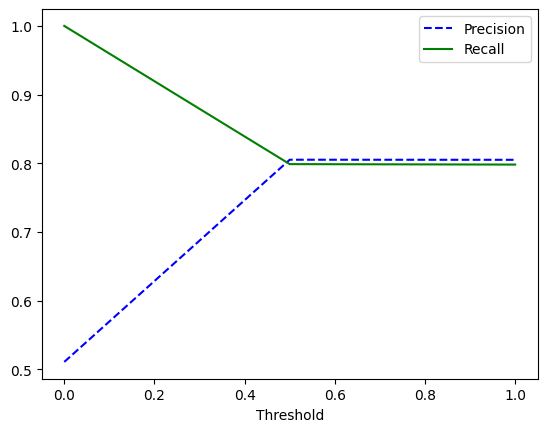

[[1151  291]
 [ 303 1203]]
              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1442
           1       0.81      0.80      0.80      1506

    accuracy                           0.80      2948
   macro avg       0.80      0.80      0.80      2948
weighted avg       0.80      0.80      0.80      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for Random Forest: 0.51


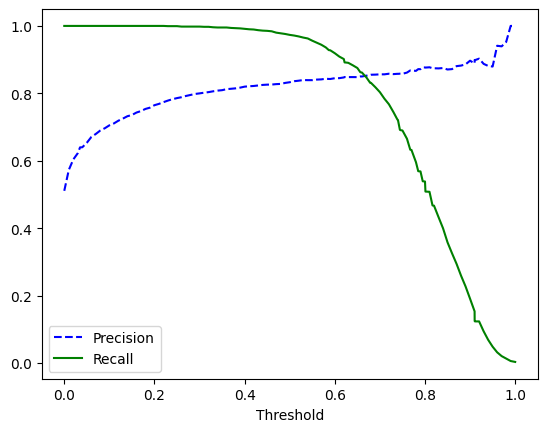

[[1155  287]
 [  43 1463]]
              precision    recall  f1-score   support

           0       0.96      0.80      0.88      1442
           1       0.84      0.97      0.90      1506

    accuracy                           0.89      2948
   macro avg       0.90      0.89      0.89      2948
weighted avg       0.90      0.89      0.89      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
XGB
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for XGB: 0.38890936970710754


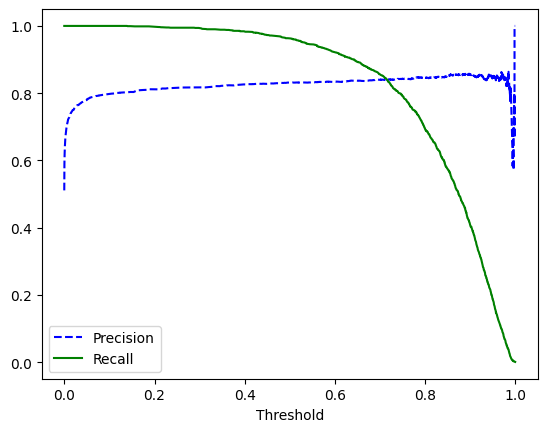

[[1128  314]
 [  22 1484]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1442
           1       0.83      0.99      0.90      1506

    accuracy                           0.89      2948
   macro avg       0.90      0.88      0.88      2948
weighted avg       0.90      0.89      0.88      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Light XGB
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[LightGBM] [Info] Number of positive: 3407, number of negative: 3471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000946 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3020
[LightGBM] [Info] Number of data points in the train set: 6878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495347 -> initscore=-0.018611
[LightGBM] [Info] Start training from score -0.018611
Optimal Threshold f

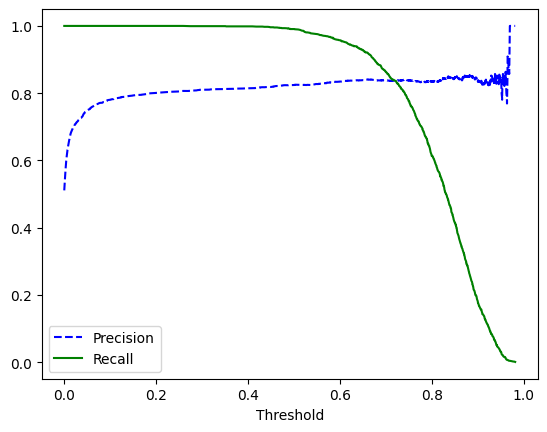

[[1122  320]
 [  10 1496]]
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      1442
           1       0.82      0.99      0.90      1506

    accuracy                           0.89      2948
   macro avg       0.91      0.89      0.89      2948
weighted avg       0.91      0.89      0.89      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Catboost
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for Catboost: 0.4952871502293376


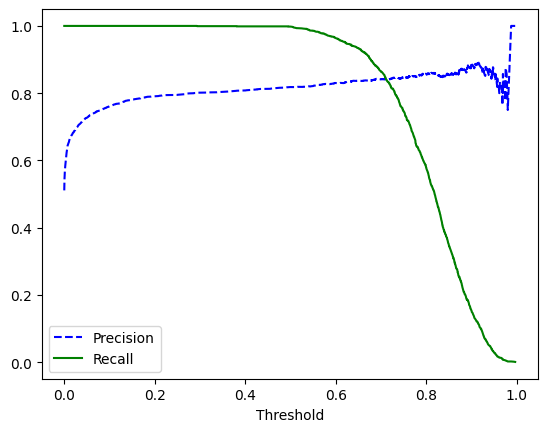

[[1107  335]
 [   2 1504]]
              precision    recall  f1-score   support

           0       1.00      0.77      0.87      1442
           1       0.82      1.00      0.90      1506

    accuracy                           0.89      2948
   macro avg       0.91      0.88      0.88      2948
weighted avg       0.91      0.89      0.88      2948



In [ ]:
model_threshold = train_test_model_tuned_thresh(concatenated_train_encoded_os, target_encoded_os, selected_models)

Unencoded oversampled:

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for Decision Tree: 0.5


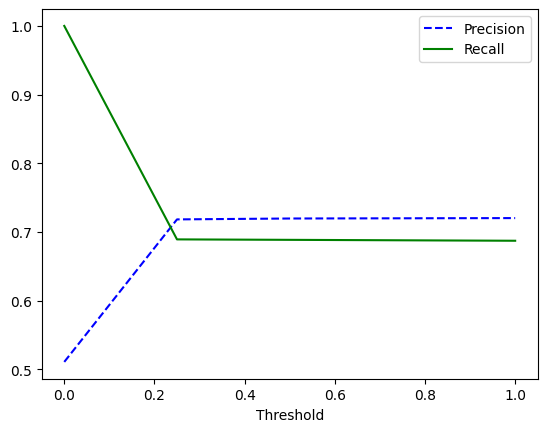

[[1038  404]
 [ 469 1037]]
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      1442
           1       0.72      0.69      0.70      1506

    accuracy                           0.70      2948
   macro avg       0.70      0.70      0.70      2948
weighted avg       0.70      0.70      0.70      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for Random Forest: 0.37


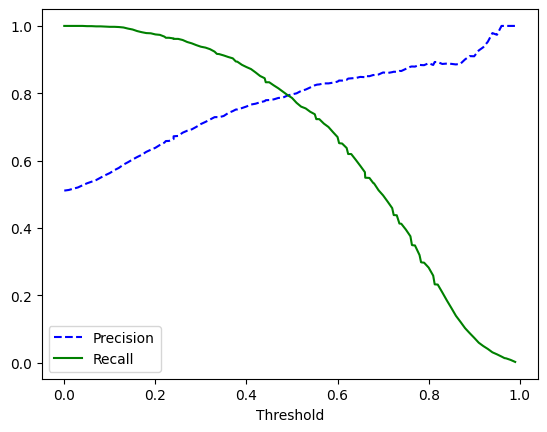

[[ 981  461]
 [ 145 1361]]
              precision    recall  f1-score   support

           0       0.87      0.68      0.76      1442
           1       0.75      0.90      0.82      1506

    accuracy                           0.79      2948
   macro avg       0.81      0.79      0.79      2948
weighted avg       0.81      0.79      0.79      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
XGB
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for XGB: 0.3419485092163086


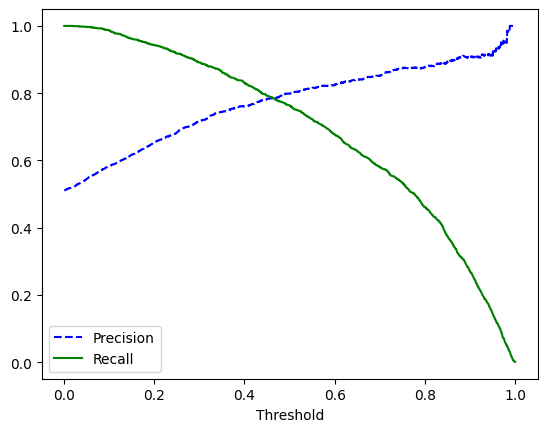

[[ 988  454]
 [ 193 1313]]
              precision    recall  f1-score   support

           0       0.84      0.69      0.75      1442
           1       0.74      0.87      0.80      1506

    accuracy                           0.78      2948
   macro avg       0.79      0.78      0.78      2948
weighted avg       0.79      0.78      0.78      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Light XGB
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[LightGBM] [Info] Number of positive: 3407, number of negative: 3471
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003065 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 6878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495347 -> initscore=-0.018611
[LightGBM] [Info] Start training from score -0.018611
Optimal Threshold for Light XGB: 0.41861727795804726


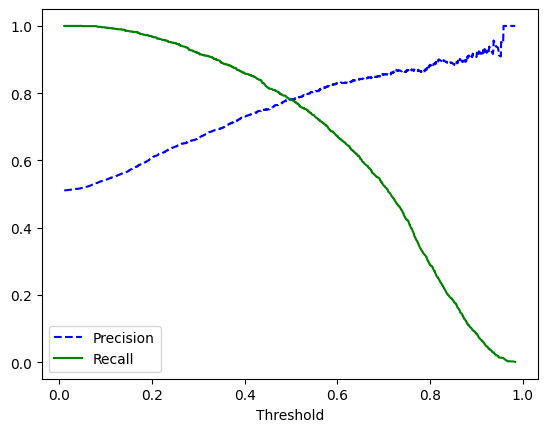

[[ 993  449]
 [ 225 1281]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1442
           1       0.74      0.85      0.79      1506

    accuracy                           0.77      2948
   macro avg       0.78      0.77      0.77      2948
weighted avg       0.78      0.77      0.77      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Catboost
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for Catboost: 0.3926545358705059


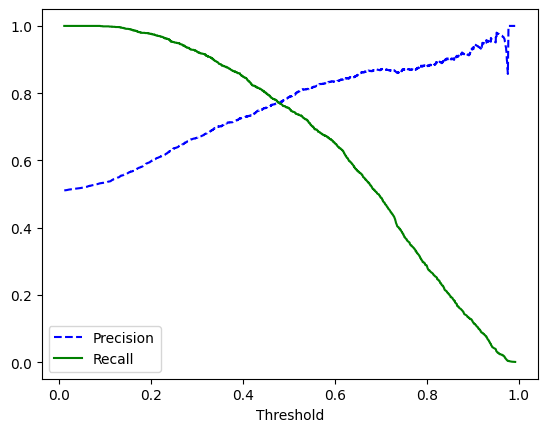

[[ 951  491]
 [ 212 1294]]
              precision    recall  f1-score   support

           0       0.82      0.66      0.73      1442
           1       0.72      0.86      0.79      1506

    accuracy                           0.76      2948
   macro avg       0.77      0.76      0.76      2948
weighted avg       0.77      0.76      0.76      2948



In [ ]:
model_threshold = train_test_model_tuned_thresh(concatenated_train_int_os, target_int_os, selected_models)

Submit Model Threshold Tunning model on Kaggle:

In [ ]:
def find_threshold(train, target, model):
  X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

  model.fit(X_train, y_train)

  y_scores = model.predict_proba(X_test)[:, 1]

  precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

  f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
  optimal_idx = np.argmax(f1_scores)
  optimal_threshold = thresholds[optimal_idx]

  return optimal_threshold

def model_tuned_thresh(train, target, test, simple_models):

  for name, model in selected_models.items():

    threshold = find_threshold(train, target, model)

    print(f"{name}...")

    model.fit(train, target)

    # Adjust predictions based on the new threshold
    test_pred = model.predict_proba(test[train.columns])[:, 1] >= threshold

    # save the result
    result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred.astype(int)})
    result.to_csv(f'{name}.csv', index=False)

    print(pd.Series(test_pred).value_counts())
    print(f"Result with threshold {threshold} Saved!", '\n')

Encoded Oversampled:

In [ ]:
model_tuned_thresh(concatenated_train_encoded_os, target_encoded_os, test_encoded, selected_models)

Decision Tree...
True     2002
False     526
Name: count, dtype: int64
Result with threshold 0.5 Saved! 

Random Forest...
True     2497
False      31
Name: count, dtype: int64
Result with threshold 0.46 Saved! 

XGB...
True     2510
False      18
Name: count, dtype: int64
Result with threshold 0.38890936970710754 Saved! 

[LightGBM] [Info] Number of positive: 3407, number of negative: 3471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000944 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3020
[LightGBM] [Info] Number of data points in the train set: 6878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495347 -> initscore=-0.018611
[LightGBM] [Info] Start training from score -0.018611
Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wi

Result on Kaggle Leaderboard:
> * Decision Tree: 0.70717
> * Random Forest: 0.82475
> * XGB: 0.83154
> * Catboost: 0.83041
> * Light XGB: 0.83323

Turns out Light XGB performed better.

Unencoded Oversampled:

In [ ]:
model_tuned_thresh(concatenated_train_int_os, target_int_os, test_int, simple_models)

Decision Tree...
True     1817
False     711
Name: count, dtype: int64
Result with threshold 0.5 Saved! 

Random Forest...
True     2229
False     299
Name: count, dtype: int64
Result with threshold 0.4 Saved! 

XGB...
True     2228
False     300
Name: count, dtype: int64
Result with threshold 0.3419485092163086 Saved! 

[LightGBM] [Info] Number of positive: 3407, number of negative: 3471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1186
[LightGBM] [Info] Number of data points in the train set: 6878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495347 -> initscore=-0.018611
[LightGBM] [Info] Start training from score -0.018611
Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wise

Result on Kaggle Leaderboard:
> * Decision Tree: 0.70717
> * Random Forest: 0.74222
> * XGB: 0.74674
> * Catboost: 0.74109
> * Light XGB: 0.72809

Turns out XGB performed better.

**Setting specific thresold for all the models:**

In [ ]:
def model_tuned_specific_threshold(train, target, test, threshold_value):

  for name, model in selected_models.items():

    threshold = threshold_value

    print(f"{name}...")

    model.fit(train, target)

    # Adjust predictions based on the new threshold
    test_pred = model.predict_proba(test[train.columns])[:, 1] >= threshold

    # save the result
    result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred.astype(int)})
    result.to_csv(f'{name}.csv', index=False)

    print(pd.Series(test_pred).value_counts())
    print(f"Result with threshold {threshold} Saved!", '\n')

Non Encoded Oversampled Data:

In [ ]:
model_tuned_specific_threshold(concatenated_train_int_os, target_int_os, test_int, 0.425)

Decision Tree...
True     1811
False     717
Name: count, dtype: int64
Result with threshold 0.425 Saved! 

Random Forest...
True     2181
False     347
Name: count, dtype: int64
Result with threshold 0.425 Saved! 

XGB...
True     2109
False     419
Name: count, dtype: int64
Result with threshold 0.425 Saved! 

Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1218
[LightGBM] [Info] Number of data points in the train set: 9826, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
True     2142
False     386
Name: count, dtype: int64
Result with threshold 0.425 Saved! 

Catboost...
True     2136
False     392
Name: count, dtype: int64
Result with thre

Result on Kaggle Leaderboard:
> * Decision Tree: 0.64273
> * Random Forest: 0.74166
> * XGB: 0.7156
> * Catboost: 0.72696
> * Light XGB: 0.72413

Turns out Random Forest performed better.

Encoded Oversampled Dataset

In [ ]:
model_tuned_specific_threshold(concatenated_train_encoded_os, target_encoded_os, test_encoded, 0.41)

Decision Tree...
True     1999
False     529
Name: count, dtype: int64
Result with threshold 0.41 Saved! 

Random Forest...
True     2508
False      20
Name: count, dtype: int64
Result with threshold 0.41 Saved! 

XGB...
True     2504
False      24
Name: count, dtype: int64
Result with threshold 0.41 Saved! 

Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3043
[LightGBM] [Info] Number of data points in the train set: 9826, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
True     2524
False       4
Name: count, dtype: int64
Result with threshold 0.41 Saved! 

Catboost...
True     2525
False       3
Name: count, dtype: int64
Result with threshol

Result on Kaggle Leaderboard:
> * Decision Tree: 0.
> * Random Forest: 0.82645
> * XGB: 0.83041
> * Catboost: 0.83267
> * Light XGB: 0.83323

Turns out XGB performed better.

### Begining of ignore cells <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

**Prediction with Adjusted Threshold**

In [ ]:
# setting threshold to 0.45 for Decision tree
dt = DecisionTreeClassifier()
dt.fit(concatenated_train, target)

# Adjust predictions based on the new threshold
test_pred = dt.predict_proba(test[concatenated_train.columns])[:, 1] >= 0.45

# save the result
result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred.astype(int)})
result.to_csv(f'dt2.csv', index=False)

In [ ]:
# setting threshold to 0.45 for Decision tree
lg = LogisticRegression()
lg.fit(concatenated_train, target)

# Adjust predictions based on the new threshold
test_pred = lg.predict_proba(test[concatenated_train.columns])[:, 1] >= 0.673

# save the result
result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred.astype(int)})
result.to_csv(f'lg2.csv', index=False)

**Random forest with threshold of 0.41 on a Oversampled Simple Model**

In [ ]:
# setting threshold to 0.45 for Decision tree
rf = RandomForestClassifier()
rf.fit(concatenated_train, target)

# Adjust predictions based on the new threshold
test_pred = rf.predict_proba(test[concatenated_train.columns])[:, 1] >= 0.41

# save the result
result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred.astype(int)})
result.to_csv(f'rf3.csv', index=False)

This socred 0.83550 on **kaggle leaderboard**

In [ ]:
simple_models

{'Logistic Regression': LogisticRegression(),
 'Decision Tree': DecisionTreeClassifier(),
 'Random Forest': RandomForestClassifier(),
 'Support Vector Machine': SVC(),
 'XGB': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=True, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=42, ...),
 'Light XGB': LGBMClassifier(),
 'Catboost': <catboost.cor

**LightXGB and Catboost with theshold of 0.47 and 0.51 respectively**

### Begining of ignore cells <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

### Scaled Data

#### Scale the dataset

In [ ]:
def scale_data(train_df, test_df):
  numerical_transformer = Pipeline(steps=[
      ('scaler', MinMaxScaler())
  ])

  binary_columns = ['Gender_1', 'Married_1', 'Self_Employed_1',
                    'Credit_History_1', 'Education_1']
  # Bundle preprocessing for numerical and categorical features
  preprocessor = ColumnTransformer(
      transformers=[
          ('num', numerical_transformer, num_df.columns),
          ('onehot', 'passthrough', binary_columns),
          ('ordinal', 'passthrough', ordinal_columns)
      ])

  # Preprocess and apply the pipeline
  concatenated_train_processed, test_processed = preprocessor.fit_transform(train_df), preprocessor.transform(test_df)

  # Create a DataFrame for better correlation handling
  concatenated_train_preprocessed = pd.DataFrame(concatenated_train_processed, columns=train_df.columns)
  test_preprocessed = pd.DataFrame(test_processed, columns=test_df.columns)

  return concatenated_train_preprocessed, test_preprocessed

In [ ]:
concatenated_train_scaled, test_scaled = scale_data(concatenated_train_encoded, test_encoded)

Oversample the scaled dataset:

In [ ]:
#  oversmapling
sm = SMOTE(random_state=42)
concatenated_train_scaled_os, target_scaled_os = sm.fit_resample(concatenated_train_scaled, target)

check for multicolinearity:

Columns dropped due to high correlation: set() 



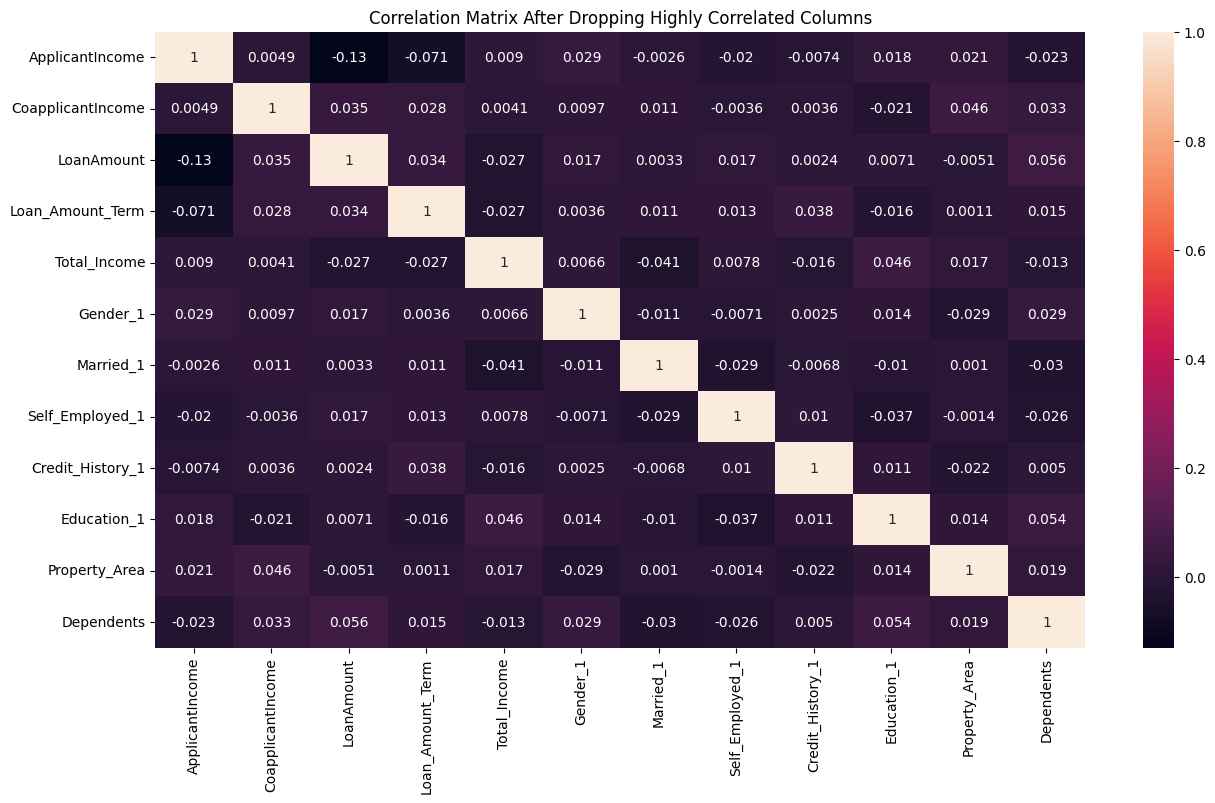

In [ ]:
check_multicolinearity(concatenated_train_scaled_os, 'scaled os')

In [ ]:
correlated_columns_to_drop

{'int df': set(), 'encoded df os': set()}

Train test model:

In [ ]:
train_test_model(concatenated_train_scaled_os, target_scaled_os, simple_models)

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Logistic Regression
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[827 615]
 [811 695]]
              precision    recall  f1-score   support

           0       0.50      0.57      0.54      1442
           1       0.53      0.46      0.49      1506

    accuracy                           0.52      2948
   macro avg       0.52      0.52      0.52      2948
weighted avg       0.52      0.52      0.51      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[1097  345]
 [ 385 1121]]
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1442
           1       0.76      0.74      0.75      1506

    accuracy                           0.75      2948
   macro avg       0.75      0.75      0.75      2948
weighted avg       0.75      0.75      0.75      2948

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[1166  276]
 [ 227 1279]]
              precision    recall  

#### Model Submission - Scaled

In [ ]:
model(concatenated_train_scaled_os, target_scaled_os, test_scaled, simple_models)

Logistic Regression...
0    1276
1    1252
Name: count, dtype: int64
Result Saved! 

Decision Tree...
1    1869
0     659
Name: count, dtype: int64
Result Saved! 

Random Forest...
1    2210
0     318
Name: count, dtype: int64
Result Saved! 

Support Vector Machine...
0    1391
1    1137
Name: count, dtype: int64
Result Saved! 

XGB...
1    2279
0     249
Name: count, dtype: int64
Result Saved! 

Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1471
[LightGBM] [Info] Number of data points in the train set: 9826, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
1    2431
0      97
Name: count, dtype: int64
Result Saved! 

Catboost...
1    2431
0  

Result on Kaggle Leaderboard:
> * Decision Tree: 0.66591
> * Logistic Regresion: 0.49845
> * Random Forest: 0.74222
> * XGB: 0.83154
> * Catboost: 0.83436
> * Light XGB: 0.83323
> * SVM: 0.45336
> * Naive Bayes: 0.36743

Turns out Light XGB performed better but all the ensemble models predicted all 1s. Random forest generalised well.

#### Tune Decision Threshold Scaled Oversample

In [ ]:
model_tuned_thresh(concatenated_train_scaled_os, target_scaled_os, test_scaled, simple_models)

Decision Tree...
True     1875
False     653
Name: count, dtype: int64
Result with threshold 0.5 Saved! 

Random Forest...
True     2358
False     170
Name: count, dtype: int64
Result with threshold 0.42 Saved! 

XGB...
True     2475
False      53
Name: count, dtype: int64
Result with threshold 0.30255016684532166 Saved! 

[LightGBM] [Info] Number of positive: 3407, number of negative: 3471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1420
[LightGBM] [Info] Number of data points in the train set: 6878, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495347 -> initscore=-0.018611
[LightGBM] [Info] Start training from score -0.018611
Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wi

Result on Kaggle Leaderboard:
> * Decision Tree: 0.66534
> * Random Forest: 0.78688
> * XGB: 0.82023
> * Catboost: 0.82419
> * Light XGB: 0.82193

Turns out Light XGB performed better but all the ensemble models predicted all 1s. Random forest generalised well.

### Feature Importance

#### Random Forest For Features Importance

In [ ]:
def feature_improtance(train, target):
  pipeline = Pipeline(steps=[
    ('classifier', RandomForestClassifier(random_state=42))
  ])
  pipeline.fit(train, target)

  feature_importances = pipeline['classifier'].feature_importances_
  feature_names = train.columns if isinstance(train, pd.DataFrame) else np.arange(X_train.shape[1])

  # Create a DataFrame to display the importance
  importance_df = pd.DataFrame({
      'Feature': feature_names,
      'Importance': feature_importances
  })

  # Sort features by importance
  importance_df = importance_df.sort_values(by='Importance', ascending=False)
  importance_df.set_index('Feature', inplace=True)

  # Display feature importance
  return importance_df

Int - oversampled:

In [ ]:
feature_improtance(concatenated_train_int_os, target_int_os)

,Importance
Feature,
ApplicantIncome,0.215173
Loan_Amount_Term,0.175762
LoanAmount,0.152045
CoapplicantIncome,0.144531
Total_Income,0.080201
Property_Area,0.077850
Dependents,0.054991
Education,0.023089
Self_Employed,0.023052


Encoded - Oversampled:

In [ ]:
feature_improtance(concatenated_train_encoded_os, target_encoded_os)

,Importance
Feature,
Property_Area,0.197552
Dependents,0.138200
ApplicantIncome,0.126903
Loan_Amount_Term,0.123129
LoanAmount,0.089627
CoapplicantIncome,0.082968
Married_1,0.059455
Self_Employed_1,0.042441
Total_Income,0.042100


Scaled - Overampled:

In [ ]:
importance_df = feature_improtance(concatenated_train_scaled_os, target_scaled_os)

importance_df

,Importance
Feature,
Loan_Amount_Term,0.226359
ApplicantIncome,0.194899
CoapplicantIncome,0.139225
LoanAmount,0.127481
Total_Income,0.122205
Dependents,0.048029
Property_Area,0.047510
Married_1,0.021007
Education_1,0.020137


Features with atleast 10% of most important features:

In [ ]:
important_f = (importance_df['Importance'][importance_df['Importance'] > max(importance_df['Importance'])*0.1]).index
important_f

Index(['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Total_Income', 'Dependents', 'Property_Area'],
      dtype='object', name='Feature')

Submitting the most important Features:

In [ ]:
model_tuned_thresh(concatenated_train_scaled_os[list(important_f)],
                   target_scaled_os,
                   test_scaled[list(important_f)],
                   simple_models)

Decision Tree...
True     1883
False     645
Name: count, dtype: int64
Result with threshold 0.5 Saved! 

Random Forest...
True     2319
False     209
Name: count, dtype: int64
Result with threshold 0.41 Saved! 

XGB...
True     2433
False      95
Name: count, dtype: int64
Result with threshold 0.36773309111595154 Saved! 

[LightGBM] [Info] Number of positive: 3407, number of negative: 3471
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1309
[LightGBM] [Info] Number of data points in the train set: 6878, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495347 -> initscore=-0.018611
[LightGBM] [Info] Start training from score -0.018611
Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing col-wis

Result on Kaggle Leaderboard for only random forest and decision tree:
> * Decision Tree: 0.66930
> * Random Forest: 0.77727

### Hyper-parameter Tunning

In [ ]:
def model_parameter_tunning(train, target, param_grid, model):

    X_train, X_test, y_train, y_test = train_test_split(train, target,
                                                      test_size=0.3, random_state=42)

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)


    grid_search.fit(X_train, y_train)

    # Print best parameters and best score
    print("Best parameters found: ", grid_search.best_params_)
    print("Best ROC-AUC score: ", grid_search.best_score_)

    # Predict on the test set
    y_pred = grid_search.best_estimator_.predict(X_test)

    # Evaluate the model
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

#### Random Forest:

In [ ]:
model = RandomForestClassifier()

param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt'],  #, 'log2'],
        'bootstrap': [True, False]
    }

model_parameter_tunning(concatenated_train_scaled_os, target_scaled_os, param_grid, model)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters found:  {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best accuracy score:  0.8389077167019028
[[1156  286]
 [ 202 1304]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83      1442
           1       0.82      0.87      0.84      1506

    accuracy                           0.83      2948
   macro avg       0.84      0.83      0.83      2948
weighted avg       0.84      0.83      0.83      2948



Using the selected parameters to make submission using AUC-ROC as the evauation metrics:

In [ ]:
rf = RandomForestClassifier(bootstrap=False, max_depth=30, max_features='sqrt',
                        min_samples_leaf=1, min_samples_split=2, n_estimators=200)
rf.fit(concatenated_train_scaled_os, target_scaled_os)

# Adjust predictions based on the new threshold
# rf.predict_proba(test_scaled[concatenated_train_scaled_os.columns])[:, 1] >= 0.42 #
test_pred = rf.predict(test_scaled[concatenated_train_scaled_os.columns])

# save the result
result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred.astype(int)})
result.to_csv(f'lg2.csv', index=False)
# pd.Series(test_pred).value_counts()

In [ ]:
pd.Series(test_pred).value_counts()

,count
1,2226
0,302


Result of Tune Hyperparameters Random Forest on Kaggle leaderboard:
> * 0.75409

It was noted that the model does not have changes to the outout irrespective of the evalueation metrics (accuracy or roc_auc) used.

#### Decision Tress

In [ ]:
model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
}

model_parameter_tunning(concatenated_train_scaled_os, target_scaled_os, param_grid, model)

Fitting 5 folds for each of 1152 candidates, totalling 5760 fits


KeyboardInterrupt: 

In [ ]:
dt = DecisionTreeClassifier(criterion='log_loss', max_depth=40, max_features=None,
                            min_samples_leaf=8, min_samples_split=2, splitter='best')

dt.fit(concatenated_train_scaled_os, target_scaled_os)

# Adjust predictions based on the new threshold
test_pred = dt.predict(test_scaled[concatenated_train_scaled_os.columns])

# save the result
result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred.astype(int)})
result.to_csv(f'dt.csv', index=False)
pd.Series(test_pred).value_counts()

,count
1,1940
0,588


Result of Tune Hyperparameters Decision Tree on Kaggle leaderboard:
> * 0.68513

It was noted that the model does not have changes to the outout irrespective of the evalueation metrics (accuracy or roc_auc) used.

### Feature Engineering

Encode before applying feature engineering. Therefore I use the encoded unsmoothened dataset:

#### Get the new dataset from the encoded dataset

In [ ]:
feature_eng_train = concatenated_train_encoded.copy(deep=True)

feature_eng_train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Total_Income', 'Gender_1', 'Married_1',
       'Self_Employed_1', 'Credit_History_1', 'Education_1', 'Property_Area',
       'Dependents'],
      dtype='object')

**Feature Engineering Training Set**

In [ ]:
feature_eng_train['Debt_Income_Ratio'] = feature_eng_train['LoanAmount'] / feature_eng_train['Total_Income']
feature_eng_train['Coapplicant_Contribution'] = feature_eng_train['CoapplicantIncome'] / feature_eng_train['Total_Income']
feature_eng_train['EMI'] = feature_eng_train['LoanAmount'] / feature_eng_train['Loan_Amount_Term']


In [ ]:
feature_eng_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income,Gender_1,Married_1,Self_Employed_1,Credit_History_1,Education_1,Property_Area,Dependents,Debt_Income_Ratio,Coapplicant_Contribution,EMI
0,8328.0,0.000000,17.0,363.0,6000.0,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.002833,0.000000,0.046832
1,150.0,3857.458782,188.0,370.0,6000.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.031333,0.642910,0.508108
2,4989.0,314.472511,17.0,348.0,6000.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.002833,0.052412,0.048851
3,150.0,0.000000,232.0,359.0,3750.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.061867,0.000000,0.646240
4,8059.0,0.000000,17.0,372.0,3750.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.004533,0.000000,0.045699


**Feature Engineering Test Set**

In [ ]:
feature_eng_test = test_encoded.copy()

In [ ]:
feature_eng_test['Debt_Income_Ratio'] = feature_eng_test['LoanAmount'] / feature_eng_test['Total_Income']
feature_eng_test['Coapplicant_Contribution'] = feature_eng_test['CoapplicantIncome'] / feature_eng_test['Total_Income']
feature_eng_test['EMI'] = feature_eng_test['LoanAmount'] / feature_eng_test['Loan_Amount_Term']

Multicolinearity:

Columns dropped due to high correlation: {'Coapplicant_Contribution', 'Debt_Income_Ratio'} 



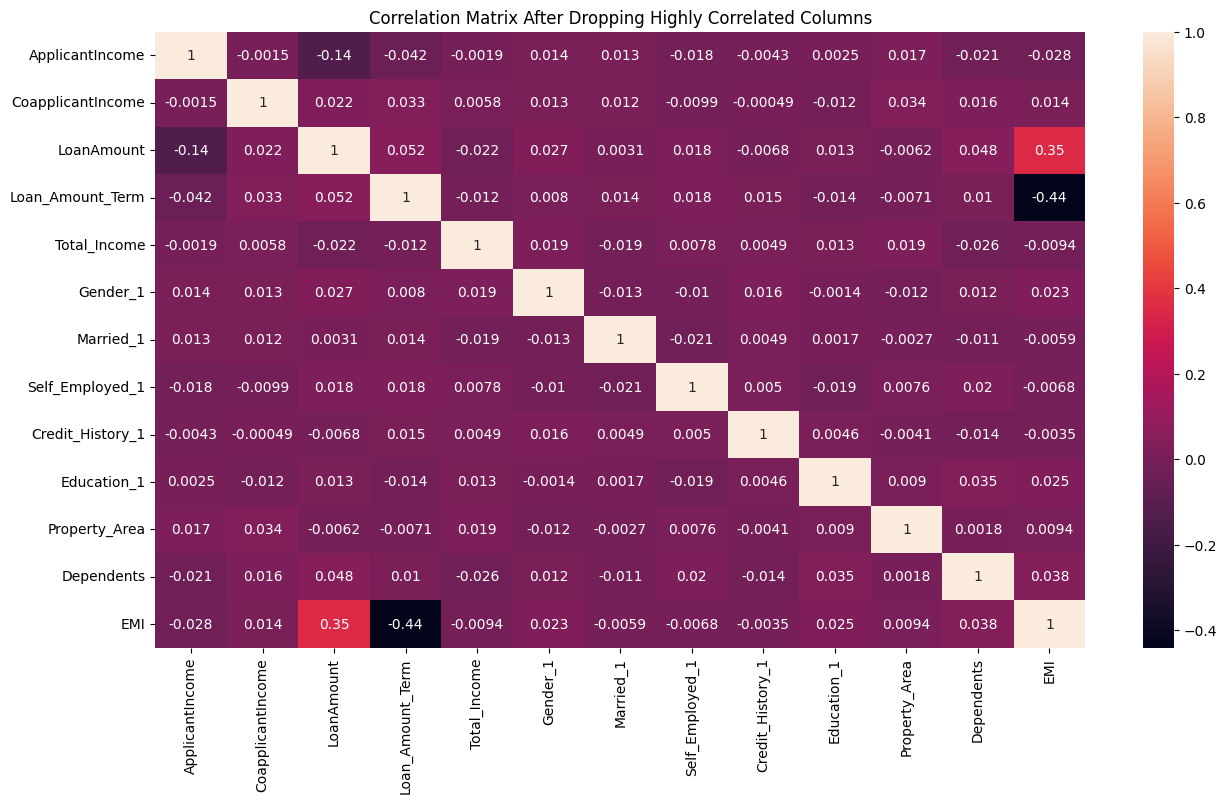

In [ ]:
check_multicolinearity(feature_eng_train, df_type='encoded df')

##### Selected Important Features
**Applying smote on the a splited train dataset only to avoid data leakage:**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(feature_eng_train, target, test_size=0.3, stratify=target, random_state=42)

def feature_eng_importance(X_train, X_test, y_train):
  # Apply SMOTE on the training set only
  smote = SMOTE(random_state=42)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  model = RandomForestClassifier(random_state=42)
  sfm = SelectFromModel(model, threshold=0.01)  # You can set a custom threshold
  X_train_selected = sfm.fit_transform(X_train, y_train)
  X_test_selected = sfm.transform(X_test)

  # List of selected features
  selected_features = feature_eng_train.columns[sfm.get_support()]

  print(f"Selected Features based on importance: {selected_features}")

  return X_train_selected, X_test_selected

In [ ]:
X_train_selected, X_test_selected = feature_eng_importance(X_train, X_test, y_train)

Selected Features based on importance: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Total_Income', 'Gender_1', 'Married_1',
       'Self_Employed_1', 'Credit_History_1', 'Education_1', 'Property_Area',
       'Dependents', 'Debt_Income_Ratio', 'Coapplicant_Contribution', 'EMI'],
      dtype='object')


In [ ]:
feature_eng_train.shape

(5898, 15)

##### Train the Model

In [ ]:
def train_test_model_eng(train, target, models_dict):

  X_train, X_test, y_train, y_test = train_test_split(train, target,
                                                      test_size=0.3, random_state=42)

  smote = SMOTE(random_state=42)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  for name, model in models_dict.items():
    print(f'{"<"*15}{">"*15}')
    print(name)
    print(f'{"<"*15}{">"*15}')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [ ]:
train_test_model_eng(feature_eng_train, target, simple_models)

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Logistic Regression
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[170 124]
 [732 744]]
              precision    recall  f1-score   support

           0       0.19      0.58      0.28       294
           1       0.86      0.50      0.63      1476

    accuracy                           0.52      1770
   macro avg       0.52      0.54      0.46      1770
weighted avg       0.75      0.52      0.58      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  67  227]
 [ 321 1155]]
              precision    recall  f1-score   support

           0       0.17      0.23      0.20       294
           1       0.84      0.78      0.81      1476

    accuracy                           0.69      1770
   macro avg       0.50      0.51      0.50      1770
weighted avg       0.73      0.69      0.71      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  11  283]
 [  58 1418]]
              precision    recall  

##### Smote the Featured Engineered Dataset

In [ ]:
smote = SMOTE(random_state=42)
feature_eng_train_os, featured_eng_target_os = smote.fit_resample(feature_eng_train, target)

##### Make Prediction

In [ ]:
model(feature_eng_train_os, featured_eng_target_os, feature_eng_test, selected_models)

Decision Tree...
1    2023
0     505
Name: count, dtype: int64
Result Saved! 

Random Forest...
1    2440
0      88
Name: count, dtype: int64
Result Saved! 

XGB...
1    2460
0      68
Name: count, dtype: int64
Result Saved! 

Light XGB...
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002250 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3808
[LightGBM] [Info] Number of data points in the train set: 9826, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
1    2516
0      12
Name: count, dtype: int64
Result Saved! 

Catboost...
1    2514
0      14
Name: count, dtype: int64
Result Saved! 



Result on Kaggle Leaderboard:
> * Random Forest: 0.81288
> * XGB: 0.81232
> * Catboost: 0.82984
> * Light XGB: 0.83210

Turns out Light XGB performed better but all the ensemble models predicted all 1s. Random forest generalised well.

##### Find threshold

In [ ]:
def train_test_model_tuned_thresh_eng(train, target, simple_models):
  X_train, X_test, y_train, y_test = train_test_split(train, target,
                                                      test_size=0.3, random_state=42)

  smote = SMOTE(random_state=42)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  models_threshold = {}

  for name, model in simple_models.items():
    print(f'{"<"*15}{">"*15}')
    print(name)
    print(f'{"<"*15}{">"*15}')

    # Fit the pipeline to the training data
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)[:, 1]

    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1])
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx]
    models_threshold[name] = optimal_threshold
    print(f"Optimal Threshold for {name}: {optimal_threshold}")
    # Plot Precision-Recall Curve
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="best")
    plt.show()

    print(confusion_matrix(y_test, (y_scores >= optimal_threshold).astype(int)))
    print(classification_report(y_test, (y_scores >= optimal_threshold).astype(int)), '\n')

  return models_threshold

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for Decision Tree: 0.0


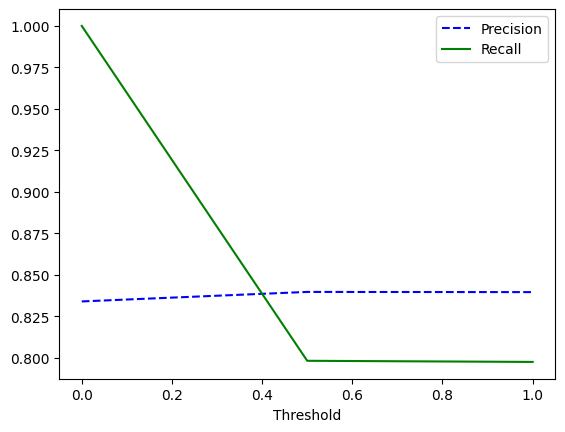

[[   0  294]
 [   0 1476]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.83      1.00      0.91      1476

    accuracy                           0.83      1770
   macro avg       0.42      0.50      0.45      1770
weighted avg       0.70      0.83      0.76      1770
 

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for Random Forest: 1.0


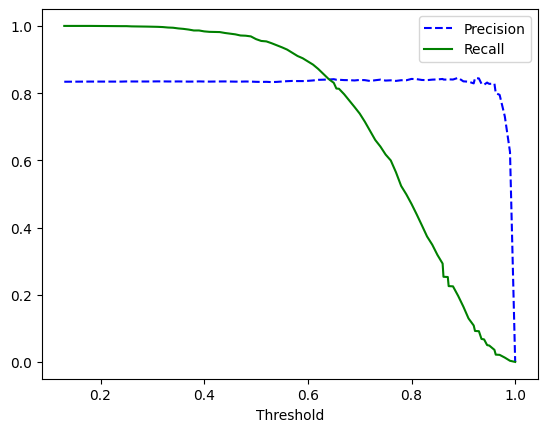

[[ 293    1]
 [1476    0]]
              precision    recall  f1-score   support

           0       0.17      1.00      0.28       294
           1       0.00      0.00      0.00      1476

    accuracy                           0.17      1770
   macro avg       0.08      0.50      0.14      1770
weighted avg       0.03      0.17      0.05      1770
 

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
XGB
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for XGB: 0.2104068547487259


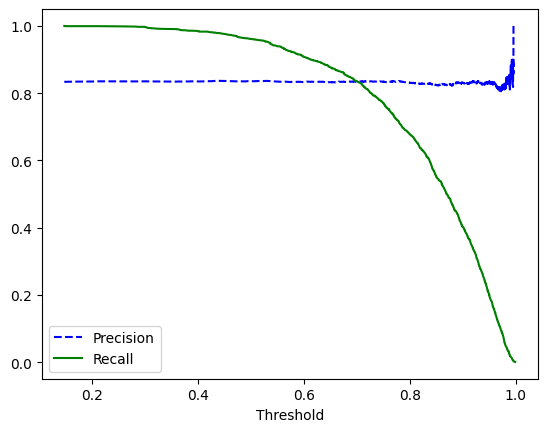

[[   3  291]
 [   1 1475]]
              precision    recall  f1-score   support

           0       0.75      0.01      0.02       294
           1       0.84      1.00      0.91      1476

    accuracy                           0.84      1770
   macro avg       0.79      0.50      0.47      1770
weighted avg       0.82      0.84      0.76      1770
 

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Light XGB
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[LightGBM] [Info] Number of positive: 3437, number of negative: 3437
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3814
[LightGBM] [Info] Number of data points in the train set: 6874, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Optimal Threshold for Light XGB: 0.36197424407859935


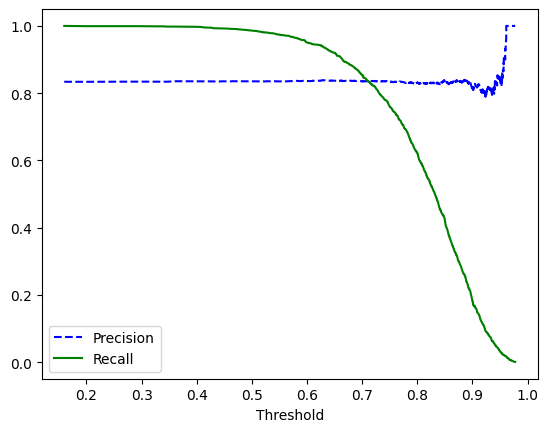

[[   4  290]
 [   3 1473]]
              precision    recall  f1-score   support

           0       0.57      0.01      0.03       294
           1       0.84      1.00      0.91      1476

    accuracy                           0.83      1770
   macro avg       0.70      0.51      0.47      1770
weighted avg       0.79      0.83      0.76      1770
 

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Catboost
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Optimal Threshold for Catboost: 0.34534759639641793


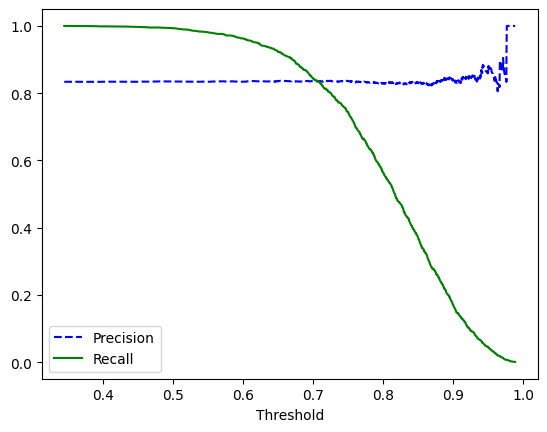

[[   0  294]
 [   0 1476]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       294
           1       0.83      1.00      0.91      1476

    accuracy                           0.83      1770
   macro avg       0.42      0.50      0.45      1770
weighted avg       0.70      0.83      0.76      1770
 



{'Decision Tree': 0.0,
 'Random Forest': 1.0,
 'XGB': 0.21040685,
 'Light XGB': 0.36197424407859935,
 'Catboost': 0.34534759639641793}

In [ ]:
train_test_model_tuned_thresh_eng(feature_eng_train, target, selected_models)

##### Preset threshold

In [ ]:
def train_test_model_preset_tuned_thresh_eng(train, target, simple_models, thresh):
  X_train, X_test, y_train, y_test = train_test_split(train, target,
                                                      test_size=0.3, random_state=42)

  smote = SMOTE(random_state=42)
  X_train, y_train = smote.fit_resample(X_train, y_train)

  pos = 0

  for name, model in simple_models.items():
    print(f'{"<"*15}{">"*15}')
    print(name)
    print(f'{"<"*15}{">"*15}')

    # Fit the pipeline to the training data
    model.fit(X_train, y_train)

    y_scores = model.predict_proba(X_test)[:, 1]

    print(confusion_matrix(y_test, (y_scores >= thresh[pos]).astype(int)))
    print(classification_report(y_test, (y_scores >= thresh[pos]).astype(int)), '\n')

    pos += 1

In [ ]:
train_test_model_preset_tuned_thresh_eng(feature_eng_train, target, selected_models,
                                         [0.41, 0.63, 0.7, 0.7, 0.7])

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  75  219]
 [ 315 1161]]
              precision    recall  f1-score   support

           0       0.19      0.26      0.22       294
           1       0.84      0.79      0.81      1476

    accuracy                           0.70      1770
   macro avg       0.52      0.52      0.52      1770
weighted avg       0.73      0.70      0.71      1770
 

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  42  252]
 [ 189 1287]]
              precision    recall  f1-score   support

           0       0.18      0.14      0.16       294
           1       0.84      0.87      0.85      1476

    accuracy                           0.75      1770
   macro avg       0.51      0.51      0.51      1770
weighted avg       0.73      0.75      0.74      1770
 

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
XGB
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  48  246]
 [ 244 1232]]
              precision    recall  f1-score

Using the selected threhold for prediction:

In [ ]:
def model_preset_tuned_thresh_eng(train, target, test, simple_models, thresh):

  pos = 0

  for name, model in simple_models.items():
    print(f'{"<"*15}{">"*15}')
    print(name)
    print(f'{"<"*15}{">"*15}')

    # Fit the pipeline to the training data
    model.fit(train, target)

    test_pred = (model.predict_proba(test)[:, 1] >= thresh[pos]).astype(int)

    print(pd.Series(test_pred).value_counts())
    pos += 1

    # save the result
    result = pd.DataFrame({'ID': test_id, 'TARGET': test_pred})
    result.to_csv(f'{name}.csv', index=False)

In [ ]:
model_preset_tuned_thresh_eng(feature_eng_train_os, featured_eng_target_os,
                              feature_eng_test, selected_models,
                               [0.41, 0.63, 0.7, 0.7, 0.7])

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
1    2013
0     515
Name: count, dtype: int64
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
1    2221
0     307
Name: count, dtype: int64
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
XGB
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
1    2160
0     368
Name: count, dtype: int64
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Light XGB
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[LightGBM] [Info] Number of positive: 4913, number of negative: 4913
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3808
[LightGBM] [Info] Number of data points in the train set: 9826, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
1    2263
0     265
Name: count, dtype: int64
<<<<<<<<<<<<<<<>>>>>>>>>>>

Result on Kaggle Leaderboard:
> * Decision Tree: 0.71339
> * Random Forest: 0.76710
> * XGB: 0.73374
> * Catboost: 0.82984
> * Light XGB: 0.74901

Turns out Light XGB performed better but all the ensemble models predicted all 1s. Random forest generalised well.

#### Get the new dataset from the int dataset

In [ ]:
feature_eng_int_train = concatenated_train_int.copy(deep=True)

feature_eng_int_train['Debt_Income_Ratio'] = feature_eng_int_train['LoanAmount'] / feature_eng_int_train['Total_Income']
feature_eng_int_train['Coapplicant_Contribution'] = feature_eng_int_train['CoapplicantIncome'] / feature_eng_int_train['Total_Income']
feature_eng_int_train['EMI'] = feature_eng_int_train['LoanAmount'] / feature_eng_int_train['Loan_Amount_Term']

In [ ]:
feature_eng_int_test = test_int.copy()

feature_eng_int_test['Debt_Income_Ratio'] = feature_eng_int_test['LoanAmount'] / feature_eng_int_test['Total_Income']
feature_eng_int_test['Coapplicant_Contribution'] = feature_eng_int_test['CoapplicantIncome'] / feature_eng_int_test['Total_Income']
feature_eng_int_test['EMI'] = feature_eng_int_test['LoanAmount'] / feature_eng_int_test['Loan_Amount_Term']

##### Check for multicolinearity

Columns dropped due to high correlation: {'Coapplicant_Contribution', 'Debt_Income_Ratio'} 



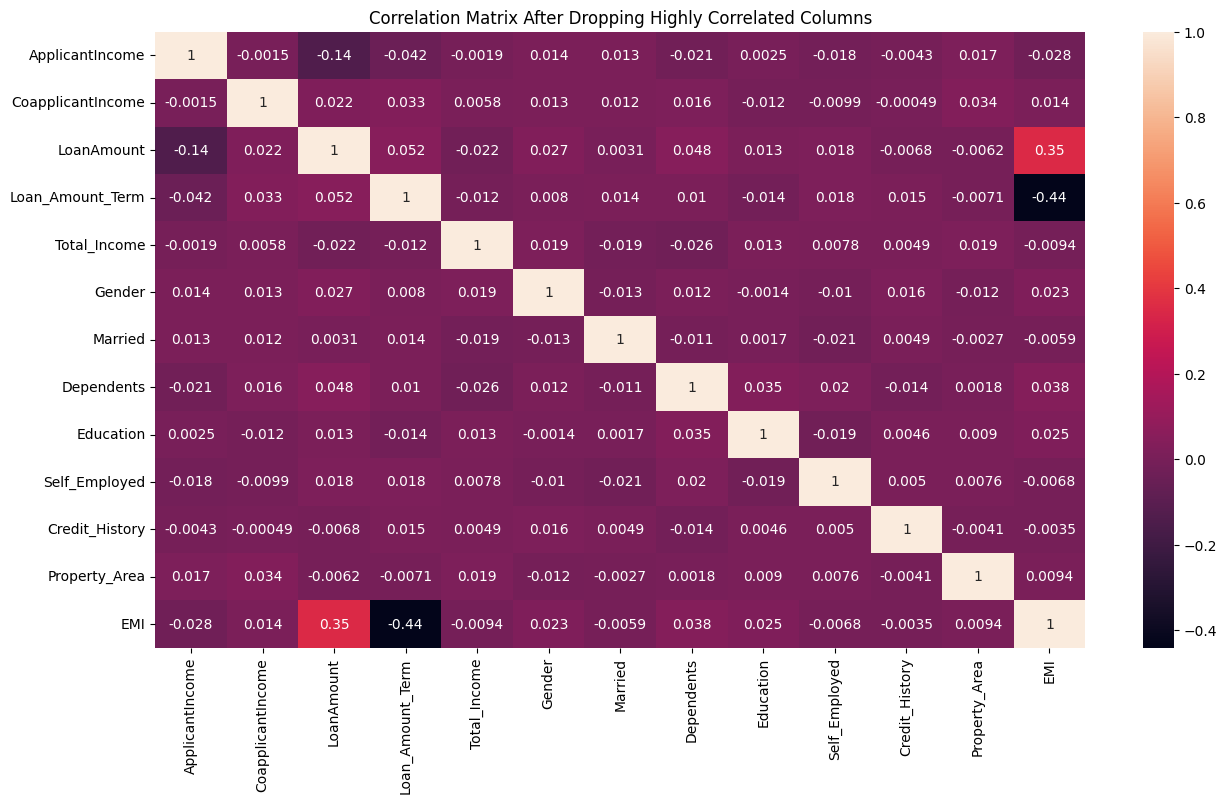

In [ ]:
check_multicolinearity(feature_eng_int_train, df_type='int df')

##### Train the model

In [ ]:
train_test_model_eng(feature_eng_int_train, target, simple_models)

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Logistic Regression
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[134 160]
 [593 883]]
              precision    recall  f1-score   support

           0       0.18      0.46      0.26       294
           1       0.85      0.60      0.70      1476

    accuracy                           0.57      1770
   macro avg       0.52      0.53      0.48      1770
weighted avg       0.74      0.57      0.63      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  77  217]
 [ 457 1019]]
              precision    recall  f1-score   support

           0       0.14      0.26      0.19       294
           1       0.82      0.69      0.75      1476

    accuracy                           0.62      1770
   macro avg       0.48      0.48      0.47      1770
weighted avg       0.71      0.62      0.66      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  59  235]
 [ 307 1169]]
              precision    recall  

#### Get new dataset from the original dataset

In [ ]:
original_eng_train = concatenated_train.copy(deep=True)

In [ ]:
original_eng_train['Debt_Income_Ratio'] = original_eng_train['LoanAmount'] / original_eng_train['Total_Income']
original_eng_train['Coapplicant_Contribution'] = original_eng_train['CoapplicantIncome'] / original_eng_train['Total_Income']
original_eng_train['EMI'] = original_eng_train['LoanAmount'] / original_eng_train['Loan_Amount_Term']


In [ ]:
original_eng_test = test.copy()

In [ ]:
original_eng_test['Debt_Income_Ratio'] = original_eng_test['LoanAmount'] / original_eng_test['Total_Income']
original_eng_test['Coapplicant_Contribution'] = original_eng_test['CoapplicantIncome'] / original_eng_test['Total_Income']
original_eng_test['EMI'] = original_eng_test['LoanAmount'] / original_eng_test['Loan_Amount_Term']


**Preprocess**

In [ ]:
original_train_encoded_eng, original_test_encoded_eng =  encode_categorical(original_eng_train, original_eng_test)

In [ ]:
# scale the numerical columns
original_train_encoded_eng, original_test_encoded_eng = scale_data(original_train_encoded_eng, original_test_encoded_eng)

In [ ]:
train_test_model_eng(original_train_encoded_eng, target, simple_models)

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Logistic Regression
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[173 121]
 [767 709]]
              precision    recall  f1-score   support

           0       0.18      0.59      0.28       294
           1       0.85      0.48      0.61      1476

    accuracy                           0.50      1770
   macro avg       0.52      0.53      0.45      1770
weighted avg       0.74      0.50      0.56      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Decision Tree
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  69  225]
 [ 360 1116]]
              precision    recall  f1-score   support

           0       0.16      0.23      0.19       294
           1       0.83      0.76      0.79      1476

    accuracy                           0.67      1770
   macro avg       0.50      0.50      0.49      1770
weighted avg       0.72      0.67      0.69      1770

<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
Random Forest
<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>
[[  35  259]
 [ 214 1262]]
              precision    recall  

In [ ]:
original_encoded_eng.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Total_Income,Gender_1,Married_1,Self_Employed_1,Credit_History_1,Education_1,Property_Area,Dependents
0,15890.0,871.075952,188.0,371.0,6000.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0
1,6582.0,896.718887,17.0,373.0,6000.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
2,7869.0,572.900354,17.0,373.0,6000.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,150.0,0.000000,247.0,349.0,6000.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0
4,8362.0,0.000000,17.0,12.0,3750.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0
